# 1.1 (a)
##

In [1]:
# coding: utf-8
# SNLP - SoSe 2019 - ASSINGMENT v

import math
import re
from collections import defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt 


def tokenize(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower())

def word_ngrams(tokenized_text, n):
    return [tuple(tokenized_text[i:i + n]) for i in range(0, len(tokenized_text)-n+1)]


class ngram_LM:
    """A class to represent a language model."""

    def __init__(self, n, ngram_counts, vocab, unk=False):
        """"Make a n-gram language model, given a vocab and
            data structure for n-gram counts."""

        self.n = n

        self.vocab = vocab

        self.V = len(vocab)

        self.ngram_counts = ngram_counts

    # YOUR CODE HERE
    # START BY MAKING THE RIGHT COUNTS FOR THIS PARTICULAR self.n
        # for unigrams, we only need total word count
        if n == 1:
            self.total_count = sum(self.ngram_counts.values())
        # for bigrams, we need total count wrt each word. In our language, it is history count.
        elif n == 2:
            self.history_count = Counter()
            for k, v in self.ngram_counts.items():
                self.history_count[k[0]] = self.history_count[k[0]] + v
            # since we only count for the first word in the tuple, we will always
            # miss counting </s>. However, since the frequency of </s> is the same
            # as the frequency of <s>, we can simply assign it equal to it.
            self.history_count['</s>'] = self.history_count['<s>']



    def estimate_prob(self, history, word):
        """Estimate probability of a word given a history."""
        if history == '':
            # unigram
            word_frequency = self.ngram_counts[tuple([word])]
            return word_frequency/self.total_count

        else:
            # bigram
            word_frequency = self.ngram_counts[tuple([history, word])]
            history_count = self.history_count[history]
            if history_count == 0:
                return 0
            return word_frequency/history_count


    def estimate_smoothed_prob(self, history, word, alpha = 0.5):
        """Estimate probability of a word given a history with Lidstone smoothing."""

        if history == '':
            # unigram
            word_frequency = self.ngram_counts[tuple([word])]
            return (word_frequency + alpha)/(alpha*self.V +self.total_count)

        else:
            # bigram
            word_frequency = self.ngram_counts[tuple([history, word])]
            history_count = self.history_count[history]
            return (word_frequency + alpha)/(alpha*self.V + history_count)


    def logP(self, history, word):
        """Return base-2 log probablity."""
        prob = self.estimate_smoothed_prob(history, word)
        log_prob = math.log(prob, 2)
        return log_prob


    def score_sentence(self, sentence):
        """Given a sentence, return score."""
        log_prob_sum = 0
        for i in range(len(sentence)):
            history = sentence[i][0]
            word = sentence[i][1]
            log_prob = self.logP(history, word)
            log_prob_sum += log_prob
        normalized_log_prob_sum = (-1 / len(sentence)) * log_prob_sum
        return normalized_log_prob_sum


    def test_LM(self):
        """Test whether or not the probability mass sums up to one."""

        precision = 10**-8

        if self.n == 1:

            P_sum = sum(self.estimate_prob('', w) for w in self.vocab)

            assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one.'

        elif self.n == 2:
            histories = ['the', 'in', 'at', 'blue', 'white']

            for h in histories:

                P_sum = sum(self.estimate_prob(h, w) for w in self.vocab)

                assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one for history' + h

        print('TEST SUCCESSFUL!')



    def test_smoohted_LM(self):
        """Test whether or not the smoothed probability mass sums up to one."""
        precision = 10**-8

        if self.n == 1:

            P_sum = sum(self.estimate_smoothed_prob('', w) for w in self.vocab)

            assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one.'

        elif self.n == 2:
            histories = ['the', 'in', 'at', 'blue', 'white']

            for h in histories:

                P_sum = sum(self.estimate_smoothed_prob(h, w) for w in self.vocab)

                assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one for history' + h

        print('TEST SUCCESSFUL!')


    def perplexity(self, test_corpus, alpha):

        likelihood = 0
        for sentence in test_corpus:
            try:
                if self.n == 1:
                    prob = self.estimate_smoothed_prob('', sentence[0], alpha)
                elif self.n ==2:
                    prob = self.estimate_smoothed_prob(sentence[0], sentence[1], alpha)
                likelihood += math.log2(prob)
            except:
                if alpha == 0:
                    continue 

        perplexity = math.pow(2, (-1*likelihood)/len(test_corpus))
        return perplexity


In [2]:
# main
filename= 'continuous.corpus.en'
with open(filename, encoding='utf-8', errors='replace') as f:
    # read entire file
    text = f.read() 

# tokenize it
tokenized_text = tokenize(text)
unigrams = Counter(tokenized_text)
bigrams = Counter(word_ngrams(tokenized_text, 2))
# print first 100 tokens to verify
print(tokenized_text[0:100])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'sir', 'arthur', 'conan', 'doyle', 'in', 'our', 'series', 'by', 'sir', 'arthur', 'conan', 'doyle', 'copyright', 'laws', 'are', 'changing', 'all', 'over', 'the', 'world', 'be', 'sure', 'to', 'check', 'the', 'copyright', 'laws', 'for', 'your', 'country', 'before', 'downloading', 'or', 'redistributing', 'this', 'or', 'any', 'other', 'project', 'gutenberg', 'ebook', 'this', 'header', 'should', 'be', 'the', 'first', 'thing', 'seen', 'when', 'viewing', 'this', 'project', 'gutenberg', 'file', 'please', 'do', 'not', 'remove', 'it', 'do', 'not', 'change', 'or', 'edit', 'the', 'header', 'without', 'written', 'permission', 'please', 'read', 'the', 'legal', 'small', 'print', 'and', 'other', 'information', 'about', 'the', 'ebook', 'and', 'project', 'gutenberg', 'at', 'the', 'bottom', 'of']


In [3]:
def calculate_PD(w1 , w2 , D, tokenized_text):
    count = 0
    N = len(tokenized_text)
    for i in range(N-D):
        if tokenized_text[i] == w1 and tokenized_text[i+D] == w2:
            count = count + 1
    return count/(N-D)

# 1.1 b
def correlation(w1 , w2 , D):
    total_words = len(tokenized_text)
    numerator = calculate_PD(w1, w2, D, tokenized_text) 
    denominator = (unigrams[w1]*unigrams[w2]) / (total_words * total_words)
    return numerator/denominator


In [4]:
# 1.1 c

inputs = [('you','your'),('he','his'),('he','her'),('she','her'),('they','their'),('she','his'), ('i', 'my'), ('we', 'our')]
data_points = {}
D = 100
for i in range(len(inputs)):
    data_points[inputs[i]] = []
    for d in range(1,D+1):
        input_i = inputs[i]
        data_points[input_i].append(correlation(input_i[0],input_i[1],d))
        print('the correlation for "{}" and "{}" for D = {} is : {}'.format(input_i[0], input_i[1], d, data_points[input_i][d-1]))

the correlation for "you" and "your" for D = 1 is : 0.9227025849811831
the correlation for "you" and "your" for D = 2 is : 10.91865712972476
the correlation for "you" and "your" for D = 3 is : 11.380019130780239
the correlation for "you" and "your" for D = 4 is : 7.996777431779431
the correlation for "you" and "your" for D = 5 is : 10.149765149908415
the correlation for "you" and "your" for D = 6 is : 7.689222976309674
the correlation for "you" and "your" for D = 7 is : 5.997599345379746
the correlation for "you" and "your" for D = 8 is : 8.150591096670029
the correlation for "you" and "your" for D = 9 is : 5.997610193125578
the correlation for "you" and "your" for D = 10 is : 5.0749055220881
the correlation for "you" and "your" for D = 11 is : 5.843835886015506
the correlation for "you" and "your" for D = 12 is : 5.382485288939143
the correlation for "you" and "your" for D = 13 is : 4.152206692201129
the correlation for "you" and "your" for D = 14 is : 5.228709452064164
the correlatio

the correlation for "he" and "his" for D = 19 is : 2.0795242797855886
the correlation for "he" and "his" for D = 20 is : 2.1061867522026785
the correlation for "he" and "his" for D = 21 is : 2.061754297082733
the correlation for "he" and "his" for D = 22 is : 1.8840185614921177
the correlation for "he" and "his" for D = 23 is : 1.875133377264361
the correlation for "he" and "his" for D = 24 is : 1.9728909299354007
the correlation for "he" and "his" for D = 25 is : 2.026214138832818
the correlation for "he" and "his" for D = 26 is : 1.750721694456208
the correlation for "he" and "his" for D = 27 is : 2.0795393248172758
the correlation for "he" and "his" for D = 28 is : 1.777385645693627
the correlation for "he" and "his" for D = 29 is : 1.9462390421278528
the correlation for "he" and "his" for D = 30 is : 2.141753576877044
the correlation for "he" and "his" for D = 31 is : 1.875146943609032
the correlation for "he" and "his" for D = 32 is : 1.919583441297812
the correlation for "he" and

the correlation for "he" and "her" for D = 37 is : 1.0463047209258505
the correlation for "he" and "her" for D = 38 is : 0.9956779735939867
the correlation for "he" and "her" for D = 39 is : 1.4513285282769801
the correlation for "he" and "her" for D = 40 is : 1.3163224137571516
the correlation for "he" and "her" for D = 41 is : 1.1981919986907525
the correlation for "he" and "her" for D = 42 is : 1.113813287768881
the correlation for "he" and "her" for D = 43 is : 1.1475662434018388
the correlation for "he" and "her" for D = 44 is : 1.282575196663789
the correlation for "he" and "her" for D = 45 is : 1.1813203284348828
the correlation for "he" and "her" for D = 46 is : 1.130693336924345
the correlation for "he" and "her" for D = 47 is : 0.894429866463376
the correlation for "he" and "her" for D = 48 is : 1.1306953820603798
the correlation for "he" and "her" for D = 49 is : 1.3500852592611001
the correlation for "he" and "her" for D = 50 is : 1.1813256702129387
the correlation for "he"

the correlation for "she" and "her" for D = 55 is : 4.773266704898078
the correlation for "she" and "her" for D = 56 is : 5.780961570774843
the correlation for "she" and "her" for D = 57 is : 5.568821228356309
the correlation for "she" and "her" for D = 58 is : 5.356680502226499
the correlation for "she" and "her" for D = 59 is : 5.780977255359761
the correlation for "she" and "her" for D = 60 is : 5.303653654654722
the correlation for "she" and "her" for D = 61 is : 5.568841373749393
the correlation for "she" and "her" for D = 62 is : 4.826333555437713
the correlation for "she" and "her" for D = 63 is : 5.356704724729142
the correlation for "she" and "her" for D = 64 is : 4.72026882835426
the correlation for "she" and "her" for D = 65 is : 4.985456979172322
the correlation for "she" and "her" for D = 66 is : 5.25064560965596
the correlation for "she" and "her" for D = 67 is : 4.402060401384015
the correlation for "she" and "her" for D = 68 is : 5.4628027879944305
the correlation for "

the correlation for "they" and "their" for D = 73 is : 1.9006272431134537
the correlation for "they" and "their" for D = 74 is : 1.3304402734202858
the correlation for "they" and "their" for D = 75 is : 2.185725283089757
the correlation for "they" and "their" for D = 76 is : 1.7105691598824235
the correlation for "they" and "their" for D = 77 is : 1.5205072950353704
the correlation for "they" and "their" for D = 78 is : 2.0906994214943935
the correlation for "they" and "their" for D = 79 is : 1.6155419231552606
the correlation for "they" and "their" for D = 80 is : 2.470831058263658
the correlation for "they" and "their" for D = 81 is : 1.9956730442509554
the correlation for "they" and "their" for D = 82 is : 1.9006427134651191
the correlation for "they" and "their" for D = 83 is : 1.5205155459269022
the correlation for "they" and "their" for D = 84 is : 1.900646151355246
the correlation for "they" and "their" for D = 85 is : 1.3304535092134813
the correlation for "they" and "their" fo

the correlation for "she" and "his" for D = 88 is : 1.089279856322888
the correlation for "she" and "his" for D = 89 is : 0.8379083395955529
the correlation for "she" and "his" for D = 90 is : 1.0613515233804771
the correlation for "she" and "his" for D = 91 is : 0.8379098552170974
the correlation for "she" and "his" for D = 92 is : 1.1451445044742317
the correlation for "she" and "his" for D = 93 is : 1.1451455401536372
the correlation for "she" and "his" for D = 94 is : 0.9496337458143206
the correlation for "she" and "his" for D = 95 is : 1.452382336559501
the correlation for "she" and "his" for D = 96 is : 0.8658440991047781
the correlation for "she" and "his" for D = 97 is : 1.2010106430309677
the correlation for "she" and "his" for D = 98 is : 1.1730812239099542
the correlation for "she" and "his" for D = 99 is : 1.2568738766371574
the correlation for "she" and "his" for D = 100 is : 0.7541250080237095
the correlation for "i" and "my" for D = 1 is : 0.12784187668095212
the correl

the correlation for "we" and "our" for D = 11 is : 5.442465681148233
the correlation for "we" and "our" for D = 12 is : 9.252200025107753
the correlation for "we" and "our" for D = 13 is : 3.2654853149218743
the correlation for "we" and "our" for D = 14 is : 7.075224580767101
the correlation for "we" and "our" for D = 15 is : 7.0752309792150445
the correlation for "we" and "our" for D = 16 is : 6.530988348622673
the correlation for "we" and "our" for D = 17 is : 6.530994254903679
the correlation for "we" and "our" for D = 18 is : 3.8097500940306315
the correlation for "we" and "our" for D = 19 is : 8.708008089996987
the correlation for "we" and "our" for D = 20 is : 4.35400798254053
the correlation for "we" and "our" for D = 21 is : 8.708023840179377
the correlation for "we" and "our" for D = 22 is : 3.8097638754402228
the correlation for "we" and "our" for D = 23 is : 4.898272269610542
the correlation for "we" and "our" for D = 24 is : 3.8097707661824076
the correlation for "we" and "

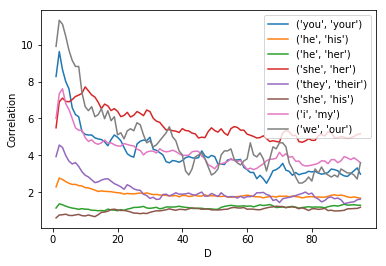

In [5]:
# part 1.1 d
running_avg = {}
window_size = 5
for input_i in inputs:
    running_avg[input_i] = []
    running_avg[input_i].append([np.mean(data_points[input_i][j:j+window_size]) for j in range(D - window_size)])


Ds = [i for i in range(1, D-window_size+1)]
for input_i, run_avg in running_avg.items():
    plt.plot(Ds, run_avg[0])
plt.legend(running_avg.keys())
plt.xlabel('D')
plt.ylabel('Correlation')
plt.show()

## 2.1 (a)

## Def P_abs(history, w, d)


### Base Case:
    history is empty:
    return (max(unigram_count(word) - d, 0) / total word count) + lambda(.) * (1 / num words in vocab)

### Recursive Case:
    history is not empty
    return ((max(ngram_count(history, w) - d), 0) / (sum for all words w', ngram count (history, w')) + lambda (history) * P_abs(history[1:], w, d)


In [8]:
# 2.1 b

vocab = list(unigrams.keys())

def lam(history, d):
    if len(history) == 0:
        return (d * len(vocab))/(len(tokenized_text))
    else:
        word_count = 0
        ngram_counts = 0
        for word in vocab:
            ngram_count = get_ngram_count(history, word)
            if ngram_count > 0:
                ngram_counts += ngram_count
                word_count += 1
 
        return (d * word_count)/(ngram_counts)


def cal_ngram_count(history, word):
    count = 0
    # if history has one element and word is empty
    if len(history) == 0:
        return unigrams[word]
    for i in range(len(tokenized_text) - len(history)):
        # if the first word of text matches first word of history
        if tokenized_text[i] == history[0]:
            # if so, check if the rest of the words in history match with rest of the words in text
            if (tokenized_text[i+1:i+len(history)] == history[1:len(history)]) and tokenized_text[i+len(history)+1] == word:
                # if true, count ++
                count = count +1
    return count

def get_ngram_count(history, word):
    if len(history) == 1:
        return bigrams[(history[0],word)]
        
    elif len(history) == 0:
        return unigrams[word]
    else:
        return cal_ngram_count(history, word)
            

def absolute_discounting_LM(history, word, d):
    
    history_length = len(history)
#     base case
    if history_length == 0:
        N = get_ngram_count(history, word)
        numerator = N-d if N-d > 0 else 0
        denominator = len(tokenized_text)
        return (numerator/denominator) + (lam(history,d)* (1/len(vocab)))
    
#     recursive case
    else:
        N = get_ngram_count(history, word)
        numerator = N-d if N-d > 0 else 0
        ngram_count = 0
        for word in vocab:
            ngram_count += get_ngram_count(history,word)
        denominator = ngram_count if N-d > 0 else 1
        history.pop(0)
        return (numerator/denominator) + (lam(history,d)*absolute_discounting_LM(history, word,d))


def perplexity_with_abs_discount(test_corpus, n, d):

    likelihood = 0
    for sentence in test_corpus:
        if n == 1:
            prob = absolute_discounting_LM([], sentence[0], d)
        elif n ==2:
            prob = absolute_discounting_LM([sentence[0]], sentence[1], d)
        likelihood += math.log2(prob)

    perplexity = math.pow(2, (-1*likelihood)/len(test_corpus))
    return perplexity


In [ ]:
TEST_CORPUS_SIMPLE = 'simple.test'
TEST_CORPUS_WIKI = 'wiki.test'

test_simple_bigrams = []
f = open(TEST_CORPUS_SIMPLE, 'r', encoding='utf-8')
for sentence in f:
    test_simple_bigrams.extend(word_ngrams(sentence, 2))
f.close()
test_wiki_bigrams = []
f = open(TEST_CORPUS_WIKI, 'r', encoding='utf-8')
for sentence in f:
    test_wiki_bigrams.extend(word_ngrams(sentence, 2))
f.close()
print('Perplexity of Simple Test:', perplexity_with_abs_discount(test_simple_bigrams, 2, 0.5))
print('Perplexity of Wiki Test:', perplexity_with_abs_discount(test_wiki_bigrams, 2, 0.5))

Perplexity of Simple Test: 214159.53924379154


In [ ]:
def plot_effect_of_d():
    perplixities_simple = []
    perplexities_wiki = []
    ds = np.arange(0.1, 1, 0.1)
    for d in ds:
        perplixities_simple.append(perplexity_with_abs_discount(test_simple_bigrams, 2, d))
        perplixities_wiki.append(perplexity_with_abs_discount(test_wiki_bigrams, 2, d))
    
    plt.plot(ds, perplexities_simple)
    plt.plot(ds, perplexities_wiki)
    plt.legend(['Simple', 'Wiki'])
    plt.xlabel('d')
    plt.ylabel('Perplexity')
    plt.show()
    
plot_effect_of_d()

# 2.1 (d)
### Due to some unkown bug, calculating perplexity takes an absurd amount of time. Therefore, we were unable to run the plotting code. However, if the mesterious bug is found, the plot should show with no problem.

# 2.1 (e)
### In Lidstone smoothing, whenever all new word ngrams in the test set are assigned the same probability. However, with the absolute discounting, new word ngrams are treated differently based on their lower ngram probabilities in the training corpora, which is using more information and thus is close to being accurate.